# RCES Final Project


In [103]:
import pandas as pd
from matplotlib import pyplot as plt
import xarray as xr
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import numpy as np
%matplotlib inline



# Import the data

## Mercury Deposition

The CSV files were downloaded from the Mercury Deposition Network (National Atmospheric Deposition Program):
- "mdn_a" dataset contains the annual Hg Deposition (HgDep [μg/m^2]) from 1996 to 2021 (only complete data)
- "mdn_w" dataset contains the weekly Hg Deposition from (HgDep [ng/m^2])1996 to 2021 (only valid data)
- "mdn" dataset contains the site information for the 84 stations from the Mercury Deposition Network accross the US (including Inactive sites).

In [177]:
# Import Annual Hg Deposition from Mercury Deposition Network
mdn_a= pd.read_csv('MDN-ALL-A-s.csv') 

# Set the Site ID as an index
mdn_ai=mdn_a.set_index("siteid") 
#mdn_ai

In [178]:
# # Import Weekly Hg Deposition from Mercury Deposition Network
# mdn_w= pd.read_csv('MDN-ALL-W-s.csv') #Load as Dataframe  Mercury Deposition Network

# # Set the Site ID as an index
# mdn_wi=mdn_w.set_index("siteID")
# #mdn_wi

In [179]:
# Import site information from Mercury Deposition Network
mdn= pd.read_csv('mdn.csv') #Load as Dataframe  Mercury Deposition Network

# Set the Site ID as an index
mdn_i=mdn.set_index("siteId")
#mdn_i

In [183]:
#combine in a single dataset the Annual HgDep data with the site coordinates
mdn_annual=mdn_ai.join(mdn_i, how="outer")
#mdn_annual

In [184]:
# mdn_weekly=mdn_wi.join(mdn_i, how="outer")
# #mdn_weekly # use only weekly data?

## Mercury in soils

The CSV files were downloaded from the Geochemical and Mineralogical Data for Soils of the Conterminous United States (1 site per 1,600 square kilometers, 4,857 sites):
- 'Top 5' dataset contains the geochemical characterization first 5 cm, including Hg [mg/kg] collected during 2007-2011.
- 'Ahorizon' dataset contains the geochemical chatacterization A horizon, including Hg [mg/kg] collected during 2007-2011.
- 'Bhorizon' dataset contains the geochemical chatacterization B horizon, including Hg [mg/kg] collected during 2007-2011.

In [ ]:
# Import Top 5cm Hg content in soils from USGS
Top5= pd.read_csv('Top5_soil.csv') 

# Set the Site ID as an index
Top5_i=Top5.set_index("SiteID") 
Top5_i = Top5_i.rename(columns={'Latitude': 'latitude', 'Longitude':'longitude'})
#Top5_i

In [185]:
# # Import A horizon Hg content in soils from USGS
# Ahorizon= pd.read_csv('Ahorizon_soil.csv') 

# # Set the Site ID as an index
# Ahorizon_i=Ahorizon.set_index("SiteID") 
# #Ahorizon_i

In [187]:
# # Import C horizon Hg content in soils from USGS
# Chorizon= pd.read_csv('Chorizon_soil.csv') 

# # Set the Site ID as an index
# Chorizon_i=Chorizon.set_index("SiteID") 
# #Chorizon_i

## Figure 1. Mercury Deposition Network and Soil monitoring sites

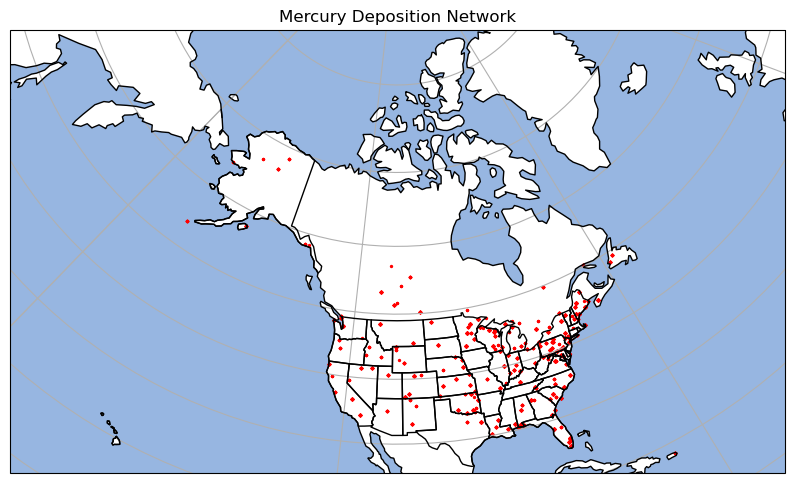

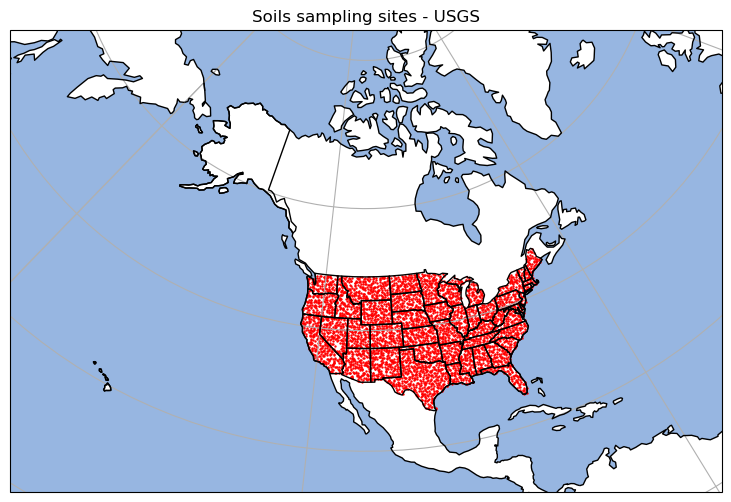

In [112]:
# visualize Mercury Deposition Network and Mercury in soils monitoring sites

# define map extent
extent = [-170, -50, 13, 80]

# better projection
proj = ccrs.LambertConformal(central_longitude=np.mean(extent[:2]), central_latitude=np.mean(extent[2:]))

# plot
fig, ax1 = plt.subplots(figsize=(10,6), subplot_kw={'projection': proj}) #plt.figure(figsize=(12, 6))
# setup map
ax1.set_extent(extent)
ax1.add_feature(cfeature.COASTLINE, edgecolor='black', zorder=9)
ax1.add_feature(cfeature.STATES, edgecolor='black', zorder=10)
ax1.add_feature(cfeature.OCEAN)

# Plot monitoring sites Mercury deposition
status=mdn_annual.status # how to color Active or Inactive??
mdn_map=ax1.scatter(mdn_annual.longitude,mdn_annual.latitude,color='red', transform=ccrs.PlateCarree(), s=2)

# decorate
ax1.set_title('Mercury Deposition Network')
ax1.gridlines()

# plot 
fig, ax2 = plt.subplots(figsize=(10,6), subplot_kw={'projection':proj})
ax2.set_extent(extent, ccrs.PlateCarree())
ax2.add_feature(cfeature.COASTLINE, edgecolor='black', zorder=9)
ax2.add_feature(cfeature.STATES, edgecolor='black', zorder=10)
ax2.add_feature(cfeature.OCEAN)

# Plot sampling sites Mercury in soils
soil_map=ax2.scatter(Top5_i.longitude,Top5_i.latitude,color='red', marker='.', transform=ccrs.PlateCarree(),s=2)

# decorate
ax2.set_title('Soils sampling sites - USGS')
ax2.gridlines()

#plt.savefig('figures/1mercurydepositionnetwork.png')

## Convert DataFrame to GeoDataFrame

In [114]:
import geopandas


In [115]:
mdn_annual_gdf = geopandas.GeoDataFrame(
    mdn_annual, geometry=geopandas.points_from_xy(mdn_annual.longitude, mdn_annual.latitude))
#mdn_annual

In [117]:
# Top5_i_gdf = geopandas.GeoDataFrame(
#     Top5_i, geometry=geopandas.points_from_xy(Top5_i.longitude, Top5_i.latitude))
# #Top5_i_gdf

In [119]:
def plot_us(gdf):
    # define map extent
    extent = [-170, -50, 8, 80]

    # better projection
    proj = ccrs.LambertConformal(central_longitude=np.mean(extent[:2]), central_latitude=np.mean(extent[2:]))

    # create axes
    fig, ax1 = plt.subplots(figsize=(10,6), subplot_kw={'projection': proj})
    ax1.set_extent(extent)
    ax1.add_feature(cfeature.OCEAN);
    ax1.add_feature(cfeature.STATES, edgecolor='black', zorder=10)
    
    #plot data
    ax1.scatter(gdf.longitude, gdf.latitude, transform=ccrs.PlateCarree(), s=2);

'Mercury Deposition Network'

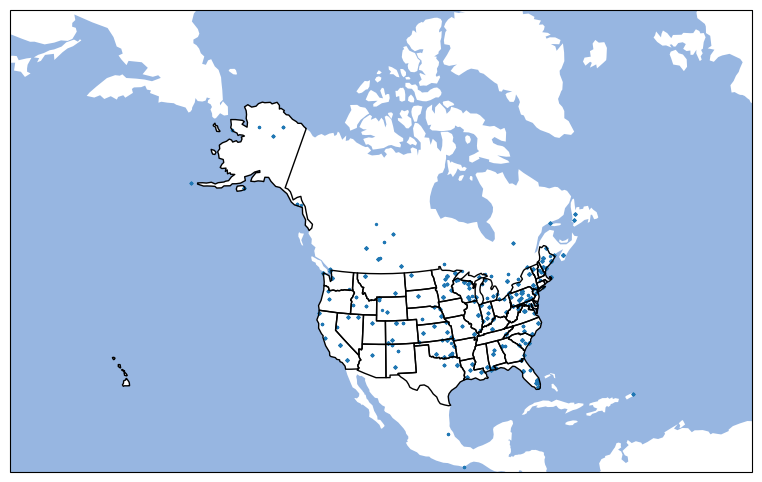

In [246]:
plot_us(mdn_annual_gdf) #same plot as above
'Mercury Deposition Network'

'Soils sampling sites - USGS'

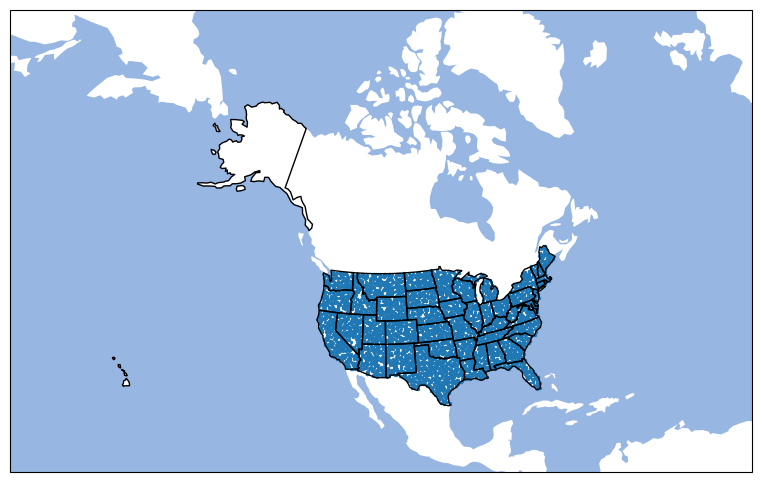

In [245]:
plot_us(Top5_i_gdf) #same plot as above
('Soils sampling sites - USGS')

## Load Cartographic Boundary Data from the US Census and Clip data

In [123]:
nation_gdf = geopandas.read_file('cb_2021_us_nation_5m.shp')

In [125]:
mdn_annual_gdf.crs = nation_gdf.crs

In [189]:
mdn_annual_nation_gdf = mdn_annual_gdf.clip(nation_gdf.geometry[nation_gdf.NAME=='United States'])
#mdn_annual_nation_gdf

In [190]:
#mdn_annual_nation_gdf.stateName.unique()

In [242]:
mdn_annual_valid=mdn_annual_nation_gdf[(mdn_annual_nation_gdf.HgDep!=-9)] 
#&(mdn_annual_gdf["state"] !='AK')] #&(mdn_annual_gdf["state"] !='PR')] #Is there a way to combine these arguments?


In [243]:
mdn_annual_valid_UScon = mdn_annual_valid[(mdn_annual_valid["state"] !='AK')& (mdn_annual_valid["state"] !='PR')]

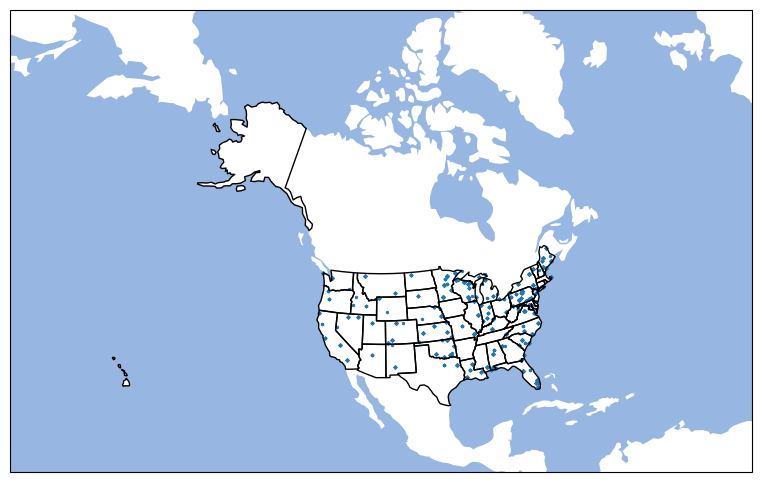

In [192]:
plot_us(mdn_annual_valid_UScon) #Data points within the contermininous US (excluding Alaska and Puerto Rico)

## Interpolation

In [133]:
from scipy.interpolate import griddata

In [247]:
x=np.arange(-170,-50,0.5)
y=np.arange(10,80,0.5)

xx, yy = np.meshgrid(x, y) # arbitrary grid

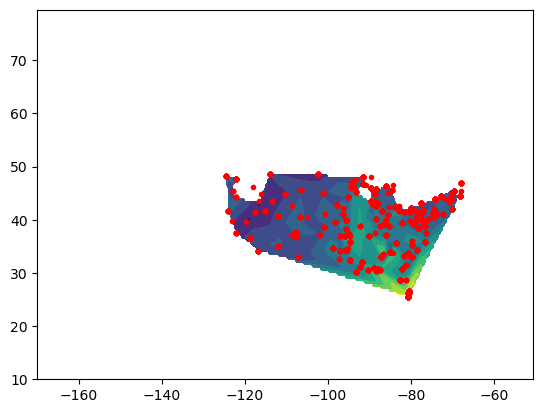

In [248]:
# interpolate
HgDep_map_gdf = griddata((mdn_annual_valid_UScon.longitude,mdn_annual_valid_UScon.latitude),mdn_annual_valid_UScon.HgDep,(xx, yy),method='linear')

#plot

fig = plt.figure()
#ax = fig.add_subplot()
plt.contourf(xx,yy,HgDep_map_gdf,10)
plt.plot(mdn_annual_valid_UScon.longitude, mdn_annual_valid_UScon.latitude,marker='.', linestyle=' ',color='red');

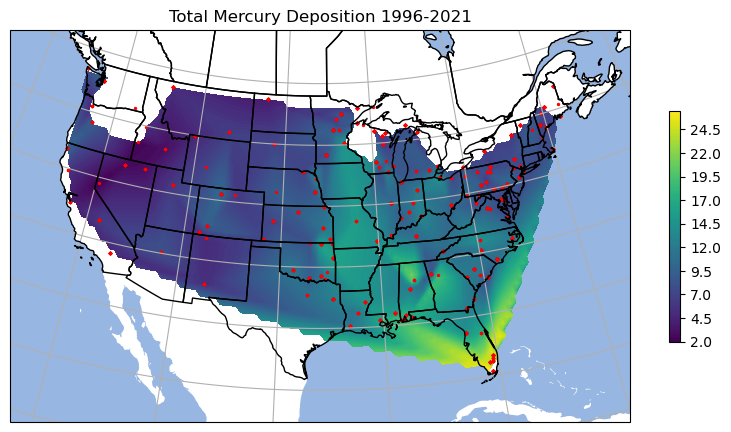

In [249]:
# define map extent
extent = [-122, -70, 20, 52]

# better projection
proj = ccrs.LambertConformal(central_longitude=np.mean(extent[:2]), central_latitude=np.mean(extent[2:]))

# plot
fig,ax = plt.subplots(figsize=(10,6), subplot_kw={'projection': proj})
# setup map
ax.set_extent(extent)
ax.add_feature(cfeature.OCEAN);
ax.add_feature(cfeature.STATES, edgecolor='black', zorder=10)

# Plot monitoring sites Mercury deposition

HgDep_map=ax.contourf(xx,yy,HgDep_map_gdf,100, transform=ccrs.PlateCarree())
ax.scatter(mdn_annual_valid_UScon.longitude, mdn_annual_valid_UScon.latitude, color='red', transform=ccrs.PlateCarree(), s=2);

# decorate
ax.set_title('Total Mercury Deposition 1996-2021')
ax.gridlines()
plt.colorbar(HgDep_map,shrink=0.5)



In [250]:
mdn_annual_valid_UScon.HgDep.nlargest(10) #Why is no

PA37    29.063
FL11    28.867
FL04    28.794
AL02    27.383
FL34    27.066
FL11    26.839
FL97    25.807
FL97    24.964
MS22    24.328
FL97    23.928
Name: HgDep, dtype: float64

# Hg in soils